In [1]:
# Nama : Moh Aji Prasetyo
# NIM : 17.01.53.0047
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
TRAIN_DATA_PATH = '/kaggle/input/dogs-vs-cats/train/train/'
TEST_DATA_PATH = '/kaggle/input/dogs-vs-cats/test/test/'

In [3]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [4]:
imgs_per_cat = 1000
img_size = 200
labels = []
train_image = []
cat = 0
dog = 0
for item in os.listdir(TRAIN_DATA_PATH):
    if item.split('.')[0] == 'cat':
        if cat >= imgs_per_cat:
            continue
        cat += 1
    elif item.split('.')[0] == 'dog':
        if dog >= imgs_per_cat:
            continue
        dog += 1
    img = image.load_img(TRAIN_DATA_PATH + str(item), target_size=(img_size, img_size))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
    labels.append(item.split('.')[0])

In [5]:
train_image[0].shape

(200, 200, 3)

In [6]:
X = np.array(train_image)

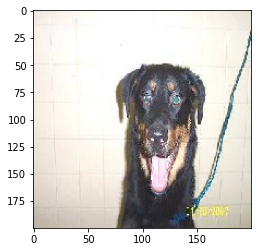

In [7]:
plt.imshow(X[1])

In [8]:
y = []
for item in labels:
    if item == 'cat':
        y.append(0)
    else:
        y.append(1)

In [9]:
new_labels = pd.get_dummies(labels)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, new_labels, random_state=42, test_size=0.2)

In [11]:
def build(width, height, depth, classes):
      #initialize the model along with the input shape to be
      #'channels last' and the channels dimension itself
      model = Sequential()
      inputShape = (height, width, depth)
      chanDim = -1

      #if we are using 'channels first', update the input shape
      #and channels dimension
      if K.image_data_format() == "channels_first":
          inputShape = (depth, height, width)
          chanDim = 1

      # CONV => RELU => POOL
      model.add(Conv2D(32, (3,3), padding='same', input_shape=inputShape))
      model.add(Activation('relu'))
      model.add(BatchNormalization(axis=chanDim))
      model.add(MaxPooling2D(pool_size=(3,3)))
      model.add(Dropout(0.25))

      # (CONV => RELU) * 2 => POOL
      model.add(Conv2D(64, (3,3), padding='same'))
      model.add(Activation('relu'))
      model.add(BatchNormalization(axis=chanDim))
      model.add(Conv2D(64, (3,3), padding='same'))
      model.add(Activation('relu'))
      model.add(BatchNormalization(axis=chanDim))
      model.add(MaxPooling2D(pool_size=(2,2)))
      model.add(Dropout(0.25))

      # (CONV => RELU) * 2 => POOL
      model.add(Conv2D(128, (3,3), padding='same'))
      model.add(Activation('relu'))
      model.add(BatchNormalization(axis=chanDim))
      model.add(Conv2D(128, (3,3), padding='same'))
      model.add(Activation('relu'))
      model.add(BatchNormalization(axis=chanDim))
      model.add(MaxPooling2D(pool_size=(2,2)))
      model.add(Dropout(0.25))

      #first (and only) set of FC => RELU layers
      model.add(Flatten())
      model.add(Dense(1024))
      model.add(Activation('relu'))
      model.add(BatchNormalization())
      model.add(Dropout(0.5))

      #softmax Classifier
      model.add(Dense(classes))
      model.add(Activation('softmax'))

      #return the constructed network architecture
      return model

In [12]:
model = build(200, 200, 3, 2)

In [13]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 200, 200, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 66, 66, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 66, 66, 64)        0

In [15]:
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.3)

Epoch 1/100
35/35 [==============================] - 7s 67ms/step - loss: 1.3724 - accuracy: 0.5847 - val_loss: 1.7716 - val_accuracy: 0.5021
Epoch 2/100
35/35 [==============================] - 2s 46ms/step - loss: 0.8064 - accuracy: 0.6740 - val_loss: 0.8711 - val_accuracy: 0.5417
Epoch 3/100
35/35 [==============================] - 2s 46ms/step - loss: 0.7006 - accuracy: 0.6961 - val_loss: 1.6104 - val_accuracy: 0.5312
Epoch 4/100
35/35 [==============================] - 2s 47ms/step - loss: 0.6797 - accuracy: 0.6952 - val_loss: 0.7874 - val_accuracy: 0.5271
Epoch 5/100
35/35 [==============================] - 2s 46ms/step - loss: 0.5259 - accuracy: 0.7712 - val_loss: 0.7289 - val_accuracy: 0.5354
Epoch 6/100
35/35 [==============================] - 2s 49ms/step - loss: 0.4461 - accuracy: 0.8130 - val_loss: 0.6948 - val_accuracy: 0.5854
Epoch 7/100
35/35 [==============================] - 2s 49ms/step - loss: 0.3634 - accuracy: 0.8474 - val_loss: 1.0568 - val_accuracy: 0.5271
Epoch 

In [16]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 18ms/step - loss: 2.1124 - accuracy: 0.6800


[2.1124207973480225, 0.6800000071525574]

In [17]:
print(model.metrics_names)

['loss', 'accuracy']


In [18]:
predictions = model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:
print(predictions)

[1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0
 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1]


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
y_testing = []
for item in y_test.index:
    if y_test['cat'][item] == 1:
        y_testing.append(0)
    else:
        y_testing.append(1)

In [22]:
print(classification_report(y_testing, predictions))

              precision    recall  f1-score   support

           0       0.61      0.90      0.73       192
           1       0.83      0.48      0.61       208

    accuracy                           0.68       400
   macro avg       0.72      0.69      0.67       400
weighted avg       0.73      0.68      0.67       400



In [23]:
print(confusion_matrix(y_testing, predictions))

[[172  20]
 [108 100]]
